In [1]:
import re
import pandas 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def cal_level(text,level):
    levelsum=0
    levelnum=1
    for i in range(0,len(level)):
        dengji=level[i]
        levelnum=levelnum+len(re.findall(dengji, text))
        levelsum=levelsum+(i+1)*len(re.findall(dengji, text))
    return levelsum/levelnum

# 斗破苍穹

In [3]:
path = 'doupocangqiong.txt'
file=open(path,'r',encoding='gbk')
doupocangqiong=file.read()
file.close()
doupocangqiong=doupocangqiong.replace('大斗师','斗狮')
chapiter=[]
for str1 in re.findall('第[1-9]\d*章', doupocangqiong):
    if str1 not in chapiter:
        chapiter.append(str1)
number=[]
for name in chapiter:
    number.append(doupocangqiong.index(name))
textlist=[]
for i in range(0,len(number)-1):
    textlist.append(doupocangqiong[number[i]:number[i+1]])
level=['斗之气','斗者','斗师','斗狮','斗灵','斗王','斗皇','斗宗','斗尊','斗圣','斗帝']
###计算等级
levellist_raw=[]
for i in range(0,len(textlist)):
    levellist_raw.append(cal_level(textlist[i],level))
#平滑去0
levellist=[]
for i in range(0,len(levellist_raw)):
    if levellist_raw[i]!=0:
        levellist.append(levellist_raw[i])
    else:
        level_up=0
        level_up_num=i
        level_down=0
        level_down_num=i
        while (level_up==0):
            level_up_num=level_up_num-1
            level_up=levellist_raw[level_up_num]
        while (level_down==0):
            level_down_num=level_down_num-1
            level_down=levellist_raw[level_down_num]
        levellist.append((level_up+level_down)/2)
###16章平均
levellist_16=[]
for i in range(0,int(len(levellist)/16)):
    sum=0
    for j in range(0,16):
        sum=sum+levellist[i*16+j]
    levellist_16.append(sum/16)

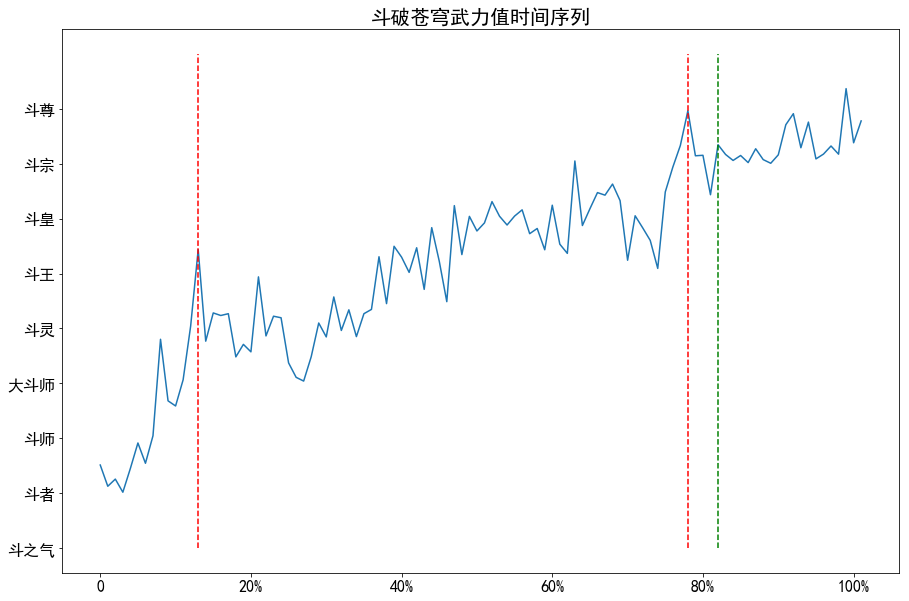

In [4]:
level1=['斗之气','斗者','斗师','大斗师','斗灵','斗王','斗皇','斗宗','斗尊','斗圣','斗帝']
pandas.DataFrame(levellist_16,columns=[('Level')]).plot(legend=False,title=('斗破苍穹武力值时间序列'),figsize=(15,10))
group_labels=['0', '20%','40%','60%','80%','100%']
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'  
plt.title('斗破苍穹武力值时间序列',fontsize=20)
plt.xticks([0,20,40,60,80,100], group_labels, rotation=0,fontsize=16)
plt.yticks(np.arange(0,9), level1, rotation=0,fontsize=16)
plt.plot([13,13],[0,9],'--r')
plt.plot([78,78],[0,9],'--r')
plt.plot([82,82],[0,9],'--g')
plt.show()

In [5]:
#寻找AIC最小的pdq
import statsmodels.api as sm
import itertools
import warnings
d=range(0,2)
p=range(0,2)
q=range(0,2)
pdq=list(itertools.product(p, d, q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

DATA=pandas.DataFrame(levellist_16)[0:90]

In [6]:
warnings.filterwarnings("ignore")#忽略warning
AIC=999999999
param_f=0
param_seasonal_f=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod=sm.tsa.statespace.SARIMAX(DATA,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            if results.aic<AIC:
                param_f=param
                param_seasonal_f=param_seasonal
                AIC=results.aic
param_f=(4,1, 1)

In [7]:


mod=sm.tsa.statespace.SARIMAX(DATA,order=param_f,seasonal_order=param_seasonal_f,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
#results.plot_diagnostics(figsize=(15, 12))

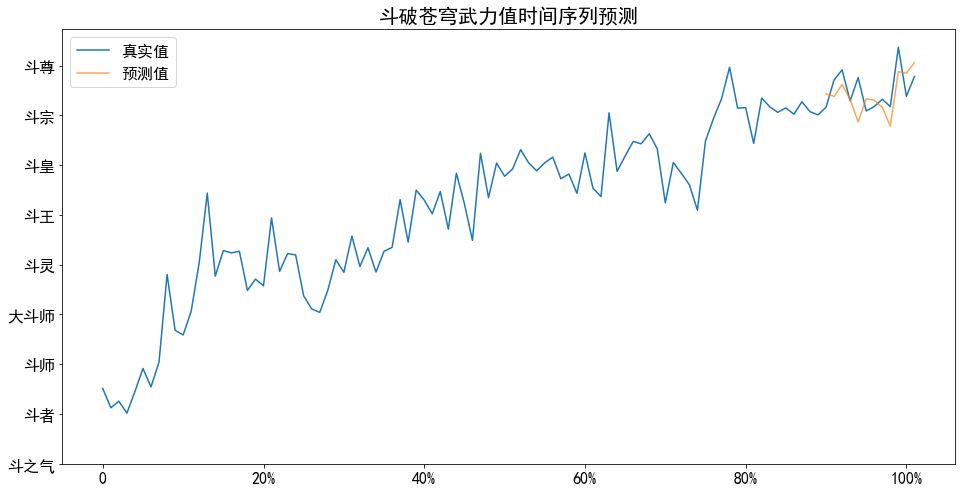

In [8]:
#对比模型的预测值和真实值
#pred = results.get_prediction(start=70,dynamic=False)
pred = results.get_forecast(steps=12, dynamic=False)
ax = pandas.DataFrame(levellist_16,columns=['真实值']).plot(label='observed',figsize=(16,8))
pandas.DataFrame(pred.predicted_mean,columns=['预测值']).plot(ax=ax, label='prediction', alpha=.7)
level1=['斗之气','斗者','斗师','大斗师','斗灵','斗王','斗皇','斗宗','斗尊','斗圣','斗帝']
plt.title('斗破苍穹武力值时间序列预测',fontsize=20)
plt.xticks([0,20,40,60,80,100], group_labels, rotation=0,fontsize=16)
plt.yticks(np.arange(0,9), level1, rotation=0,fontsize=16)
plt.legend(fontsize=16)
plt.show()

# 凡人修仙传


In [9]:
path = 'fanrenxiuxianzhuan.txt'
file=open(path,'r',encoding='gbk')
fanrenxiuxianzhuan=file.read()
file.close()
chapiter=[]
for str1 in re.findall('第[\u4e00-\u9fa5]+?章', fanrenxiuxianzhuan):
    if str1 not in chapiter:
        chapiter.append(str1)
number=[]
for name in chapiter:
    number.append(fanrenxiuxianzhuan.index(name))
textlist=[]
for i in range(0,len(number)-1):
    textlist.append(fanrenxiuxianzhuan[number[i]:number[i+1]])

In [10]:
level=['炼气','筑基','结丹','元婴','化神','炼虚','合体','大乘']
###计算等级
levellist_raw=[]
for i in range(0,len(textlist)):
    levellist_raw.append(cal_level(textlist[i],level))
#平滑去0
levellist=[]
levellist_raw[0]=0.5
for i in range(0,len(levellist_raw)):
    if levellist_raw[i]!=0:
        levellist.append(levellist_raw[i])
    else:
        level_up=0
        level_up_num=i
        level_down=0
        level_down_num=i
        while (level_up==0):
            level_up_num=level_up_num-1
            level_up=levellist_raw[level_up_num]
        while (level_down==0):
            level_down_num=level_down_num-1
            level_down=levellist_raw[level_down_num]
        levellist.append((level_up+level_down)/2)
###24章平均
levellist_24=[]
for i in range(0,int(len(levellist)/24)):
    sum=0
    for j in range(0,24):
        sum=sum+levellist[i*24+j]
    levellist_24.append(sum/24)

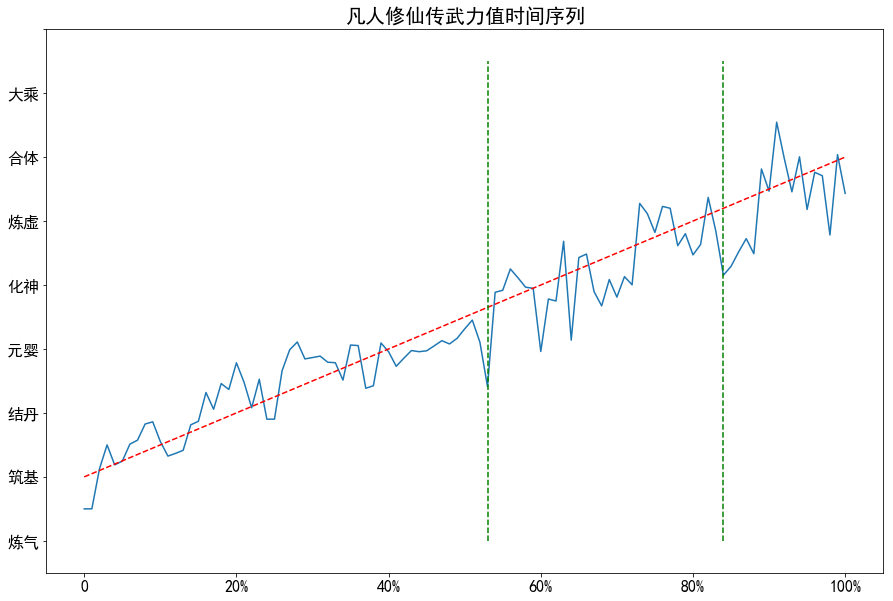

In [11]:
level1=['炼气','筑基','结丹','元婴','化神','炼虚','合体','大乘']
pandas.DataFrame(levellist_24,columns=[('Level')]).plot(legend=False,title=('凡人修仙传武力值时间序列'),figsize=(15,10))
group_labels=['0', '20%','40%','60%','80%','100%']
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'  
plt.title('凡人修仙传武力值时间序列',fontsize=20)
plt.xticks([0,20,40,60,80,100], group_labels, rotation=0,fontsize=16)
plt.ylim((-0.5,8))
plt.yticks(np.arange(0,9), level1, rotation=0,fontsize=16)
plt.plot([0,100],[1,6],'--r')
plt.plot([84,84],[0,7.5],'--g')
plt.plot([53,53],[0,7.5],'--g')
plt.show()

# 斗罗大陆

In [12]:
path = 'douluodalu.txt'
file=open(path,'r',encoding='gbk')
douluodalu=file.read()
file.close()
douluodalu=douluodalu.replace('大魂师','魂大师')
douluodalu=douluodalu.replace('巅峰斗罗','超级斗罗')
douluodalu=douluodalu.replace('绝世斗罗','极限斗罗')
douluodalu=douluodalu.replace('半神','极限斗罗')
chapiter=[]
for str1 in re.findall('第[\u4e00-\u9fa5]+?章', douluodalu):
    if str1 not in chapiter:
        chapiter.append(str1)
number=[]
for name in chapiter:
    number.append(douluodalu.index(name))
textlist=[]
for i in range(0,len(number)-1):
    textlist.append(douluodalu[number[i]:number[i+1]])

In [13]:
level=['魂士','魂师','魂大师','魂尊','魂宗	','魂王','魂帝','魂圣','魂斗罗','封号斗罗','超级斗罗','极限斗罗','神诋']
###计算等级
levellist_raw=[]
for i in range(0,len(textlist)):
    levellist_raw.append(cal_level(textlist[i],level))
#平滑去0
levellist=[]
levellist_raw[0]=0.01
for i in range(0,len(levellist_raw)):
    if levellist_raw[i]!=0:
        levellist.append(levellist_raw[i])
    else:
        level_up=0
        level_up_num=i
        level_down=0
        level_down_num=i
        while (level_up==0):
            level_up_num=level_up_num-1
            level_up=levellist_raw[level_up_num]
        while (level_down==0):
            level_down_num=level_down_num-1
            level_down=levellist_raw[level_down_num]
        levellist.append((level_up+level_down)/2)
###10章平均
levellist_10=[]
for i in range(0,int(len(levellist)/10)+1):
    sum=0
    if i==int(len(levellist)/10):
        for j in range(0,5):
            sum=sum+levellist[i*10+j]
        levellist_10.append(sum/5)
        continue
    for j in range(0,10):
        sum=sum+levellist[i*10+j]
    levellist_10.append(sum/10)


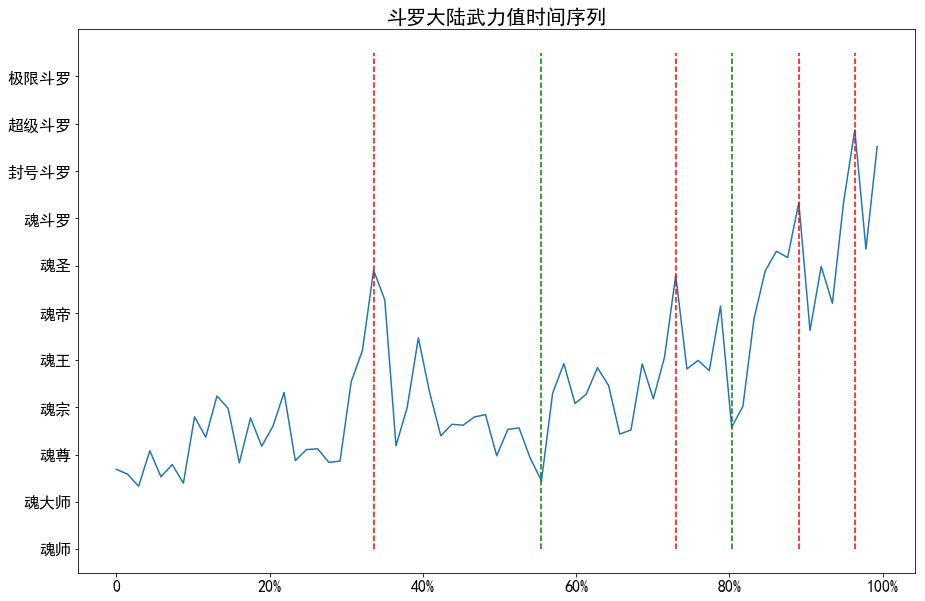

In [14]:
level1=['魂师','魂大师','魂尊','魂宗','魂王','魂帝','魂圣','魂斗罗','封号斗罗','超级斗罗','极限斗罗']#,,'神诋']
pandas.DataFrame(levellist_10,columns=[('Level')]).plot(legend=False,title=('斗罗大陆武力值时间序列'),figsize=(15,10))
group_labels=['0', '20%','40%','60%','80%','100%']
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'  
plt.title('斗罗大陆武力值时间序列',fontsize=20)
LEN=len(levellist_raw)
plt.xticks([0,LEN/10*0.2,LEN/10*0.4,LEN/10*0.6,LEN/10*0.8,LEN/10], group_labels, rotation=0,fontsize=16)
plt.ylim((-0.5,11))
plt.plot([38,38],[0,10.5],'--g')
plt.plot([55,55],[0,10.5],'--g')
plt.plot([23,23],[0,10.5],'--r')
plt.plot([50,50],[0,10.5],'--r')
plt.plot([61,61],[0,10.5],'--r')
plt.plot([66,66],[0,10.5],'--r')
plt.yticks(np.arange(0,11), level1, rotation=0,fontsize=16)
plt.show()